In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\vamshi krishna\Python Projects Main\Datasets\IMDB Dataset.csv")

In [2]:
#Print first few entries in the data
print("First few rows of the dataset: ")
print(data.head())

First few rows of the dataset: 
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
#Printing the last few entries in the data
print("The last few entries of the dataset are: ")
data.tail()

The last few entries of the dataset are: 


,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
#Printing the summary statistics
print("nSummary statistics: ")
print(data.describe())

nSummary statistics: 
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [5]:
#Print the information about the dataset
print("\nInformation about the dataset: ")
print(data.info())


Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [6]:
print(data.shape)

(50000, 2)


In [7]:
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


In [8]:
#Print the null values from all the columns
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [9]:
#Sentiment Count
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4') 

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words("english"))  # Get stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    return " ".join(tokens)

data['cleaned_review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\vamshi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\vamshi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\vamshi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\vamshi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
# Define features and labels
X = data['cleaned_review']
y = data['sentiment'].apply(lambda x: 1 if x == "positive" else 0)

In [12]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 37500
Testing set size: 12500


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3, max_df=0.85, sublinear_tf=True)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(max_iter=1000,penalty="l2",C=1.0,solver="lbfgs")
logistic_model.fit(X_train_vect, y_train)
y_pred = logistic_model.predict(X_test_vect)

Accuracy: 0.89256
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.89      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



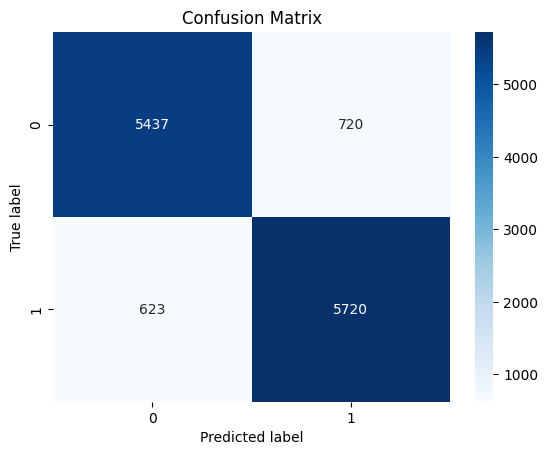

In [15]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=1.0,gamma='scale') 
svm.fit(X_train_vect,y_train)
y_pred_svm = svm.predict(X_test_vect)

Accuracy: 0.89528
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.89      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



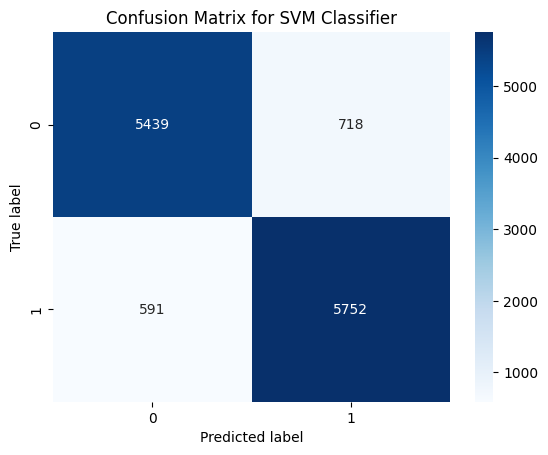

In [19]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", report_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf',C=100,gamma='scale') 
svm1.fit(X_train_vect,y_train)
y_pred_svm1 = svm1.predict(X_test_vect)

Accuracy: 0.894
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      6157
           1       0.89      0.90      0.90      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



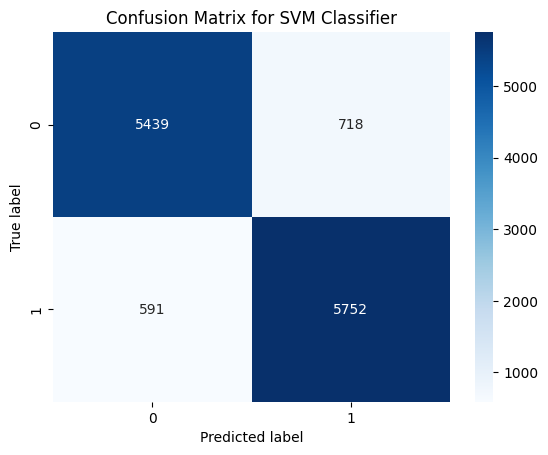

In [21]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_svm1 = accuracy_score(y_test, y_pred_svm1)
report_svm1 = classification_report(y_test, y_pred_svm1)

# Print the results
print(f"Accuracy: {accuracy_svm1}")
print("Classification Report:\n", report_svm1)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label') 
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=10)
dt.fit(X_train_vect,y_train)
y_pred_dt = dt.predict(X_test_vect)

Accuracy: 0.73216
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.62      0.69      6157
           1       0.69      0.84      0.76      6343

    accuracy                           0.73     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.74      0.73      0.73     12500



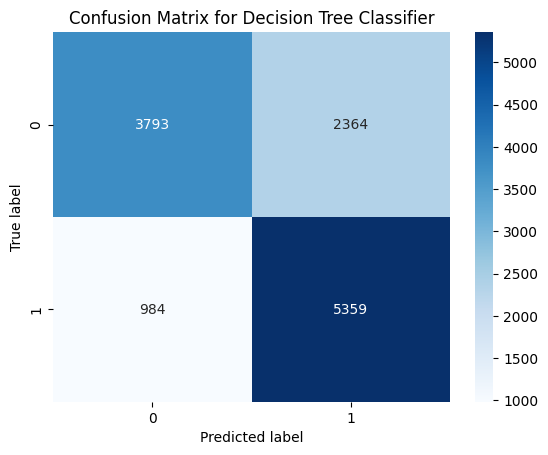

In [23]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

# Print the results
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:\n", report_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
from sklearn.svm import NuSVC
nu_svc = NuSVC(nu=0.3,kernel='rbf',gamma='scale',coef0=0.0)
nu_svc.fit(X_train_vect,y_train)
y_pred_nu_svc = nu_svc.predict(X_test_vect)

Accuracy: 0.89568
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      6157
           1       0.89      0.90      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



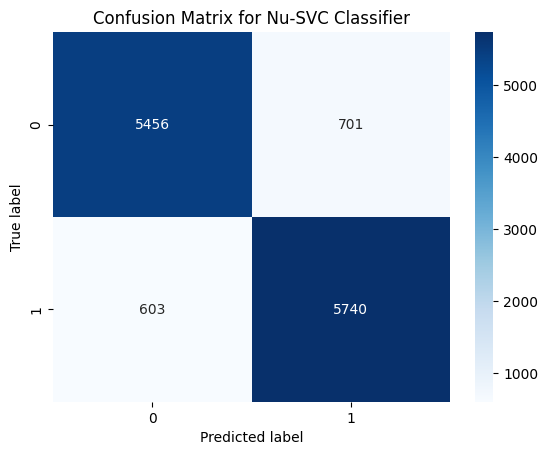

In [17]:
accuracy_nu_svm = accuracy_score(y_test, y_pred_nu_svc)
report_nu_svm = classification_report(y_test, y_pred_nu_svc)

# Print the results
print(f"Accuracy: {accuracy_nu_svm}")
print("Classification Report:\n", report_nu_svm)

conf_matrix_svm_nu = confusion_matrix(y_test, y_pred_nu_svc)
sns.heatmap(conf_matrix_svm_nu, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Nu-SVC Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_vect, y_train)
y_pred_rf = rf.predict(X_test_vect)

Accuracy: 0.8492
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      6157
           1       0.86      0.84      0.85      6343

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



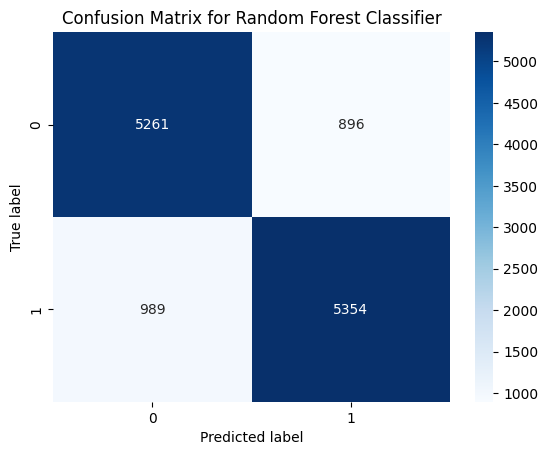

In [27]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
#NaiveBayes Classifier(Multinomial NaiveBayes)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)
y_pred_nb = nb.predict(X_test_vect)

Accuracy: 0.85888
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      6157
           1       0.86      0.87      0.86      6343

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



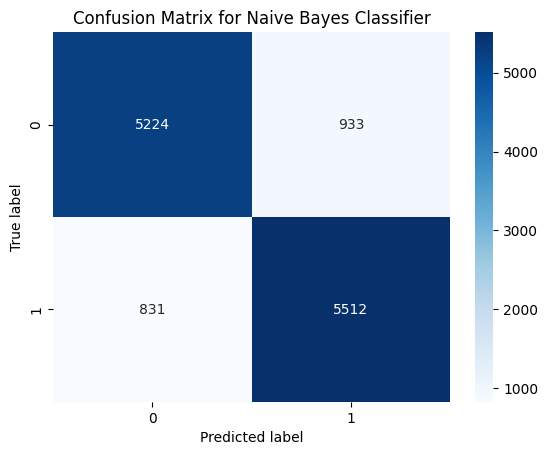

In [25]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print the results
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", report_nb)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42,max_depth=10)
gbm.fit(X_train_vect, y_train)
y_pred_gbm = gbm.predict(X_test_vect)

Accuracy: 0.83736
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      6157
           1       0.83      0.86      0.84      6343

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



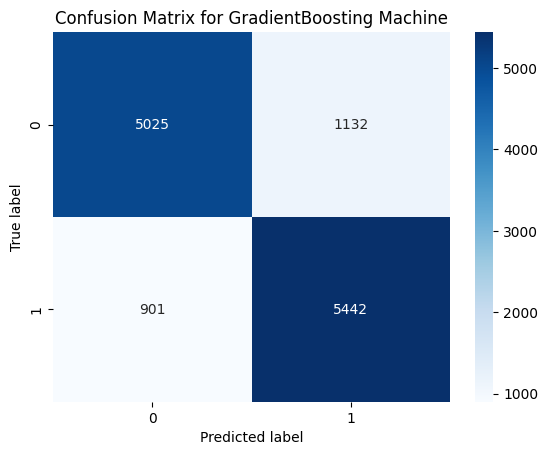

In [49]:
from sklearn.metrics import classification_report,accuracy_score

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

# Print the results
print(f"Accuracy: {accuracy_gbm}")
print("Classification Report:\n",report_gbm)

conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for GradientBoosting Machine')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge',penalty='elasticnet',max_iter=1000,learning_rate='adaptive',eta0=0.01)
sgd.fit(X_train_vect,y_train)
y_pred_sgd = sgd.predict(X_test_vect)

Accuracy: 0.89048
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



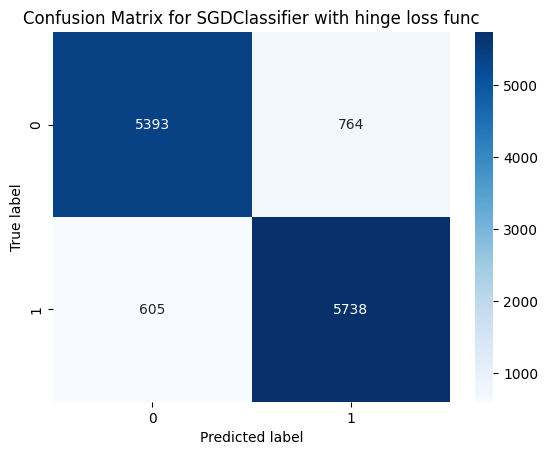

In [29]:
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)

# Print the results
print(f"Accuracy: {accuracy_sgd}")
print("Classification Report:\n", report_sgd)

conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SGDClassifier with hinge loss func')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
from sklearn.linear_model import SGDClassifier
sgd1 = SGDClassifier(loss='log_loss',penalty='elasticnet',max_iter=1000,learning_rate='adaptive',eta0=0.01)
sgd1.fit(X_train_vect,y_train)
y_pred_sgd1 = sgd1.predict(X_test_vect)

Accuracy: 0.88088
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6157
           1       0.87      0.90      0.88      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



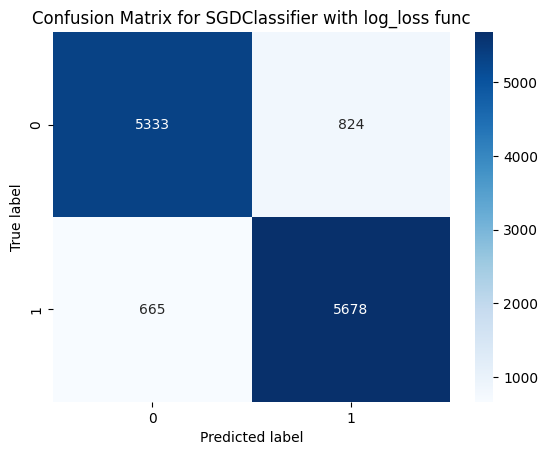

In [31]:
accuracy_sgd1 = accuracy_score(y_test, y_pred_sgd1)
report_sgd1 = classification_report(y_test, y_pred_sgd1)

# Print the results
print(f"Accuracy: {accuracy_sgd1}")
print("Classification Report:\n", report_sgd1)

conf_matrix_sgd1 = confusion_matrix(y_test, y_pred_sgd1)
sns.heatmap(conf_matrix_sgd1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SGDClassifier with log_loss func')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(penalty='l2',loss='squared_hinge',C=0.1,max_iter=1000,random_state=42)
lin_svc.fit(X_train_vect,y_train)
y_pred_lin_svc = lin_svc.predict(X_test_vect)

Accuracy: 0.89192
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.89      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



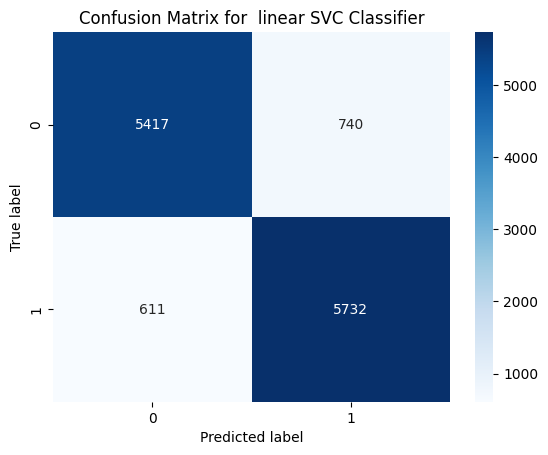

In [33]:
accuracy_svc = accuracy_score(y_test, y_pred_lin_svc)
report_svc = classification_report(y_test, y_pred_lin_svc)

# Print the results
print(f"Accuracy: {accuracy_svc}")
print("Classification Report:\n", report_svc)

conf_matrix_svm = confusion_matrix(y_test, y_pred_lin_svc)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for  linear SVC Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(125,),activation='relu',solver='adam',learning_rate='adaptive',nesterovs_momentum=True,verbose=1)
mlp.fit(X_train_vect,y_train)
y_pred_mlp = mlp.predict(X_test_vect)

Iteration 1, loss = 0.40665187
Iteration 2, loss = 0.24036598
Iteration 3, loss = 0.21506528
Iteration 4, loss = 0.20336081
Iteration 5, loss = 0.19629339
Iteration 6, loss = 0.19014731
Iteration 7, loss = 0.18509442
Iteration 8, loss = 0.17959971
Iteration 9, loss = 0.17470686
Iteration 10, loss = 0.16886847
Iteration 11, loss = 0.16344622
Iteration 12, loss = 0.15658225
Iteration 13, loss = 0.15011530
Iteration 14, loss = 0.14240172
Iteration 15, loss = 0.13456017
Iteration 16, loss = 0.12616783
Iteration 17, loss = 0.11647698
Iteration 18, loss = 0.10696208
Iteration 19, loss = 0.09694784
Iteration 20, loss = 0.08636107
Iteration 21, loss = 0.07607686
Iteration 22, loss = 0.06575973
Iteration 23, loss = 0.05568668
Iteration 24, loss = 0.04651779
Iteration 25, loss = 0.03876017
Iteration 26, loss = 0.03211717
Iteration 27, loss = 0.02683886
Iteration 28, loss = 0.02217348
Iteration 29, loss = 0.01857805
Iteration 30, loss = 0.01565932
Iteration 31, loss = 0.01342532
Iteration 32, los

Accuracy: 0.87384
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6157
           1       0.88      0.87      0.88      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



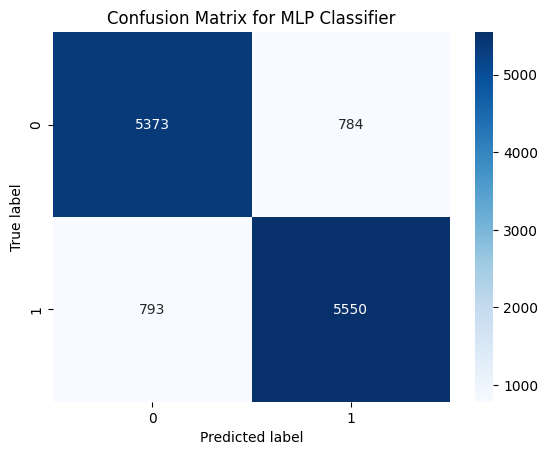

In [35]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

# Print the results
print(f"Accuracy: {accuracy_mlp}")
print("Classification Report:\n", report_mlp)

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
#LightGBM Classifier
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_estimators=150,max_depth=50)
lgbm.fit(X_train_vect,y_train)
y_pred_lgbm = lgbm.predict(X_test_vect)

c:\Users\vamshi krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
c:\Users\vamshi krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 18657, number of negative: 18843
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.284805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595413
[LightGBM] [Info] Number of data points in the train set: 37500, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497520 -> initscore=-0.009920
[LightGBM] [Info] Start training from score -0.009920


c:\Users\vamshi krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.87008
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6157
           1       0.87      0.88      0.87      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



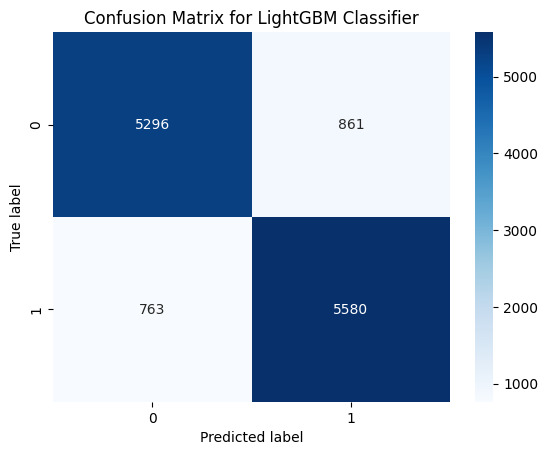

In [37]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

# Print the results
print(f"Accuracy: {accuracy_lgbm}")
print("Classification Report:\n",report_lgbm)

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LightGBM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
from sklearn.tree import ExtraTreeClassifier
ext_class = ExtraTreeClassifier(max_depth=20,random_state=42,splitter='best')
ext_class.fit(X_train_vect,y_train)
y_pred_ext_class = ext_class.predict(X_test_vect)

Accuracy: 0.65352
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.81      0.70      6157
           1       0.73      0.51      0.60      6343

    accuracy                           0.65     12500
   macro avg       0.67      0.66      0.65     12500
weighted avg       0.67      0.65      0.65     12500



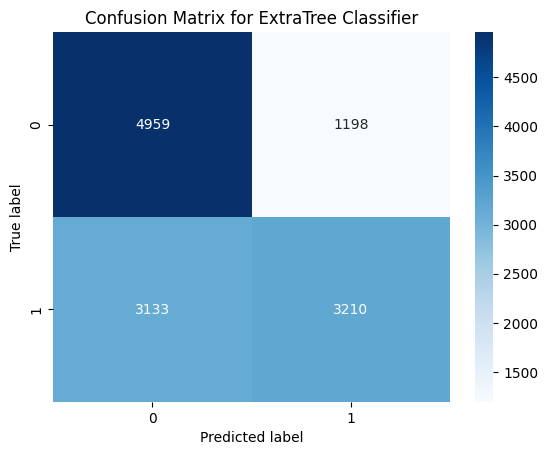

In [39]:
accuracy_ext = accuracy_score(y_test, y_pred_ext_class)
report_ext = classification_report(y_test, y_pred_ext_class)

# Print the results
print(f"Accuracy: {accuracy_ext}")
print("Classification Report:\n", report_ext)

conf_matrix_ext = confusion_matrix(y_test, y_pred_ext_class)
sns.heatmap(conf_matrix_ext, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ExtraTree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
from sklearn.ensemble import AdaBoostClassifier
adb_class = AdaBoostClassifier(learning_rate=0.1)
adb_class.fit(X_train_vect,y_train)
y_pred_adb = adb_class.predict(X_test_vect)

Accuracy: 0.65168
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.41      0.53      6157
           1       0.61      0.89      0.72      6343

    accuracy                           0.65     12500
   macro avg       0.69      0.65      0.63     12500
weighted avg       0.69      0.65      0.63     12500



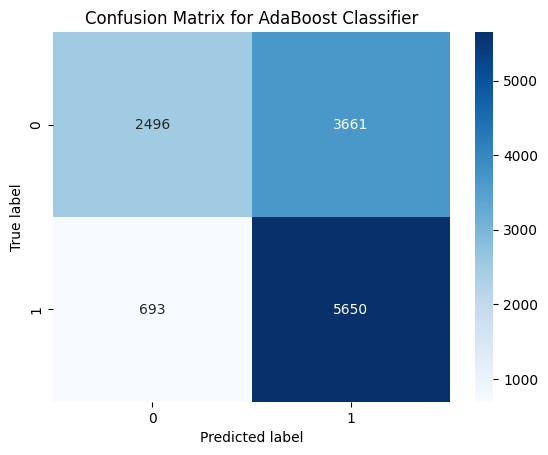

In [41]:
accuracy_adb = accuracy_score(y_test, y_pred_adb)
report_adb = classification_report(y_test, y_pred_adb)

# Print the results
print(f"Accuracy: {accuracy_adb}")
print("Classification Report:\n", report_adb)

conf_matrix_adb = confusion_matrix(y_test, y_pred_adb)
sns.heatmap(conf_matrix_adb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [51]:
# Convert sparse matrices to dense arrays
X_train_vect_dense = X_train_vect.toarray()
X_test_vect_dense = X_test_vect.toarray()

from sklearn.ensemble import HistGradientBoostingClassifier
# Train the HistGradientBoostingClassifier
hist_gdb = HistGradientBoostingClassifier(loss='log_loss', max_depth=25, random_state=42)
hist_gdb.fit(X_train_vect_dense, y_train)

# Predict and evaluate
y_pred_gdb = hist_gdb.predict(X_test_vect_dense)

Accuracy: 0.85712
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      6157
           1       0.85      0.87      0.86      6343

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



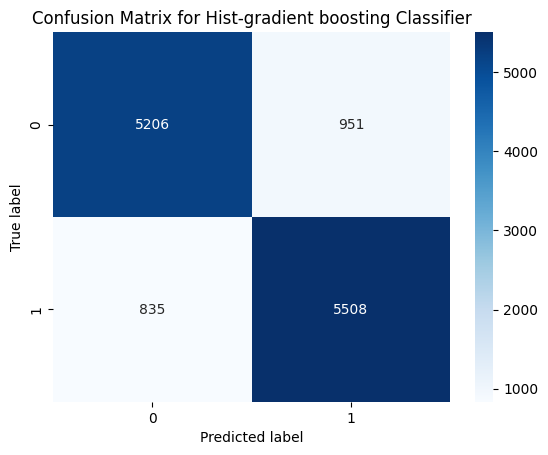

In [52]:
accuracy_hist_gdb = accuracy_score(y_test, y_pred_gdb)
report_hist_gdb = classification_report(y_test, y_pred_gdb)

# Print the results
print(f"Accuracy: {accuracy_hist_gdb}")
print("Classification Report:\n", report_hist_gdb)

conf_matrix_hist_gdb = confusion_matrix(y_test, y_pred_gdb)
sns.heatmap(conf_matrix_hist_gdb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hist-gradient boosting Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_vect,y_train)
y_pred_knn = knn.predict(X_test_vect)

Accuracy: 0.81344
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      6157
           1       0.78      0.87      0.83      6343

    accuracy                           0.81     12500
   macro avg       0.82      0.81      0.81     12500
weighted avg       0.82      0.81      0.81     12500



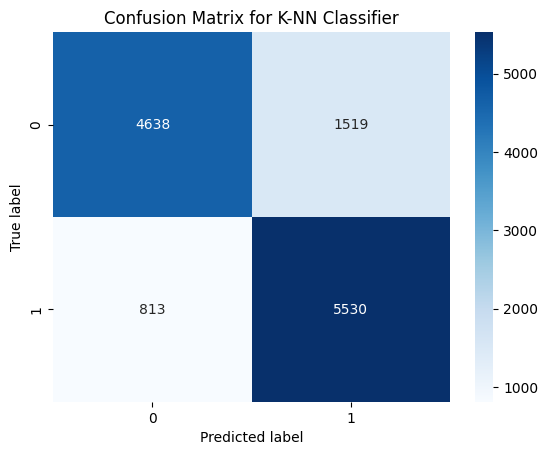

In [43]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Print the results
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:\n", report_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-NN Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=10,random_state=42)
xgb.fit(X_train_vect, y_train)
y_pred_xgb = xgb.predict(X_test_vect)

Accuracy: 0.84232
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      6157
           1       0.83      0.87      0.85      6343

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



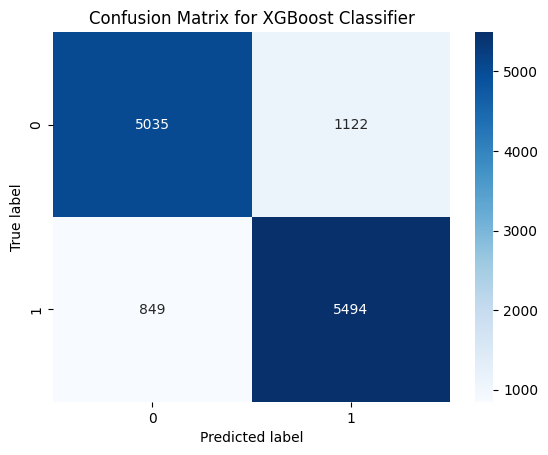

In [45]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"Accuracy: {accuracy_xgb}")
print("Classification Report:\n",report_xgb)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
#CatBoostClassifier
import catboost
catb = catboost.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=8, verbose=0)
catb.fit(X_train_vect, y_train)
y_pred_catb = catb.predict(X_test_vect)

Accuracy: 0.84256
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      6157
           1       0.83      0.87      0.85      6343

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



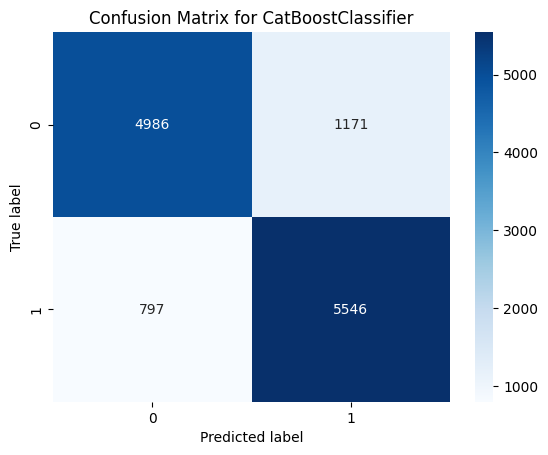

In [47]:
accuracy_catb = accuracy_score(y_test, y_pred_catb)
report_catb = classification_report(y_test, y_pred_catb)

# Print the results
print(f"Accuracy: {accuracy_catb}")
print("Classification Report:\n",report_catb)

conf_matrix_catb = confusion_matrix(y_test, y_pred_catb)
sns.heatmap(conf_matrix_catb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CatBoostClassifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()